# Introduction
This is an EDA on the sinking of the Titanic. Data is gotten from Kaggle at this address: https://www.kaggle.com/c/titanic/data?select=train.csv

Other import information like the data dictionary and variables definition are also available in the mentioned link.

In [32]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import file
train = pd.read_csv('train.csv')

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [76]:
# Basic statistical summary of our data
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.206040    0.524184   
std     256.998173    0.486260    0.834700   13.177747    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.000000    1.000000    3.000000   36.500000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Variable Description
1. PassengerId: unique id number to each passenger 2. Survived: passenger survive(1) or died(0) 3. Pclass: passenger class 4. Name: name 5. Sex: gender of passenger 6. Age: age of passenger 7. SibSp: number of siblings/spouses 8. Parch: number of parents/children 9. Ticket: ticket number 10. Fare: amount of money spent on ticket 11. Cabin: cabin category 12. Embarked: port where passenger embarked(C = Cherbourg, Q = Queenstown, S = Southampton)

# Univariate Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Age, PassengerId and Fare

## Categorical Variables

In [49]:
def bar_plot(variable):
    """
        input: variable ex: 'Sex'
        output: bar plot & value count
    """
    # get feature
    var = train[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))


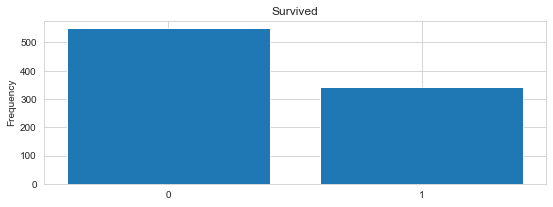

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


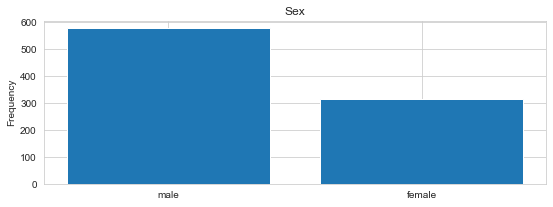

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


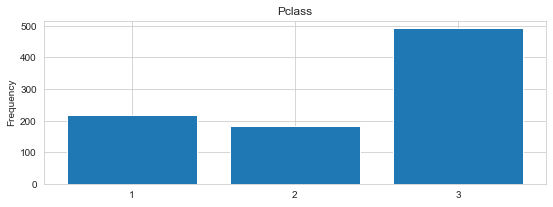

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


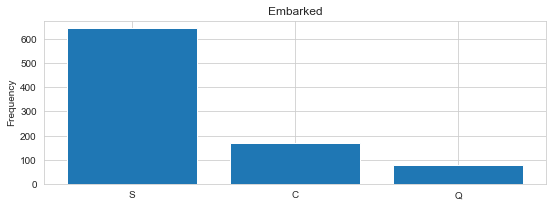

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


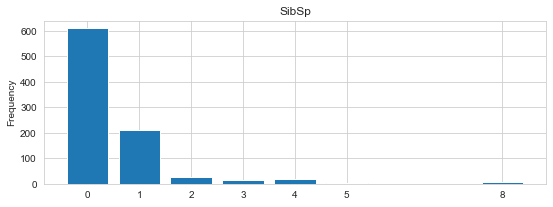

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


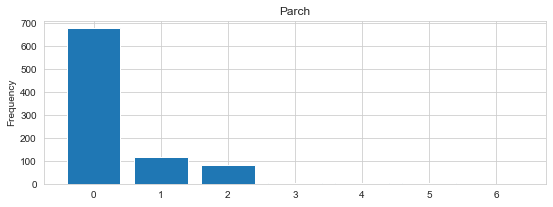

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [50]:
category1 = ["Survived", "Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [52]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train[c].value_counts()))

C23 C25 C27    4
B96 B98        4
G6             4
D              3
C22 C26        3
              ..
C95            1
B78            1
A5             1
A6             1
B69            1
Name: Cabin, Length: 147, dtype: int64 

Dahlberg, Miss. Gerda Ulrika                      1
Perkin, Mr. John Henry                            1
Carbines, Mr. William                             1
Ball, Mrs. (Ada E Hall)                           1
Beckwith, Mr. Richard Leonard                     1
                                                 ..
Dean, Mr. Bertram Frank                           1
Chambers, Mrs. Norman Campbell (Bertha Griggs)    1
Skoog, Miss. Mabel                                1
Landergren, Miss. Aurora Adelia                   1
Patchett, Mr. George                              1
Name: Name, Length: 891, dtype: int64 

1601        7
347082      7
CA. 2343    7
3101295     6
347088      6
           ..
370375      1
370370      1
14313       1
386525      1
113787      1
Name: 

## Numerical variable

In [53]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

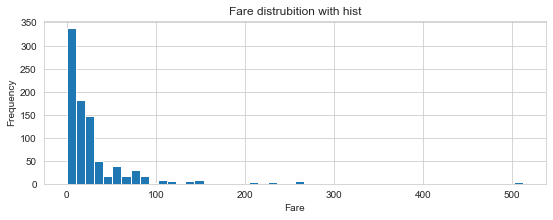

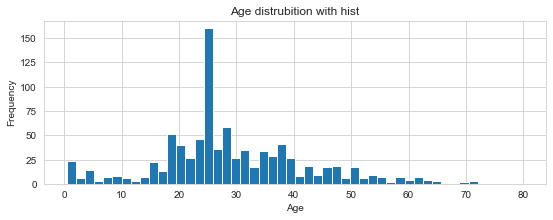

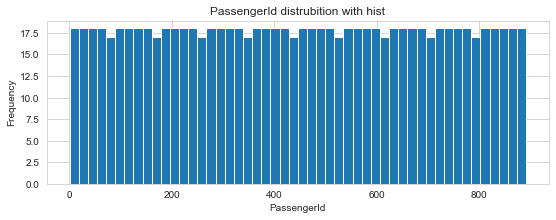

In [54]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

# Basic Analysis
* Pclass - Survived
* Sex -Survived
* SibSp - Survived
* Parch - Survived

In [55]:
# Pclass vs Survived 
train[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending = False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [56]:
# Sex vs Survived
train[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived", ascending = False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [57]:
# Sibsp vs Survived
train[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived", ascending = False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [58]:
# Parch vs Survived
train[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived", ascending = False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

# Missing values

In [10]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [13]:
# Confirming the null value check above
train.columns[train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

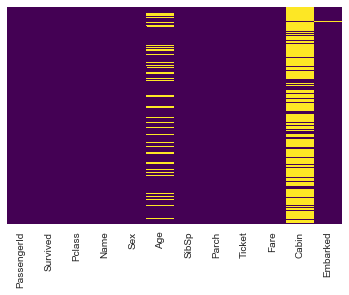

In [21]:
# determining how large the null values are
sns.set_style('whitegrid')
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Age is missing a couple of values. We have a lot of missing values in the Cabin column. And very few in Embarked. The exact values missin will be gotten using .info() command.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 rows across. From a glance, the **Age** and **Cabin** columns have missing values. **Embarked** is missing two objects.
* float64(2): Fare and Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): cabin, embarked, ticket, name and sex

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now we know that, in Age 177 is null, in Cabin 687 and in Embarked, 2.

## Bivariate Analysis

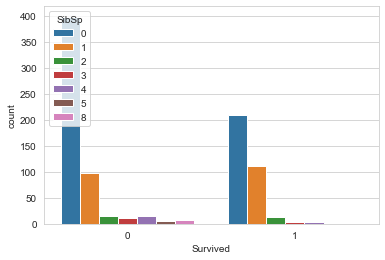

In [63]:
# visualizing survived based on SibSp
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='SibSp', data=train)

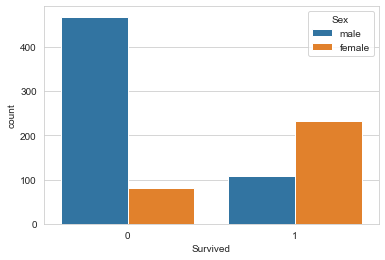

In [62]:
# visualizing Survived based on Sex
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

Most of the males did not survive whereas more of the females survived.

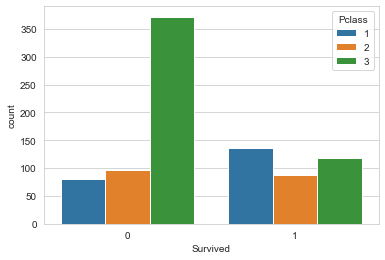

In [23]:
#  vsiualizing survived based on passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

Passenger class has three values: 1) 1 for upper class 2) for middle class and 3) for lower class
From the above, more lower class did not survive. More of the upper class did survive. The middle class fared moderately.

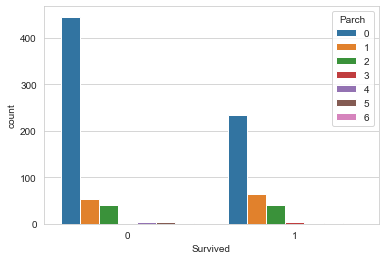

In [64]:
# visualizing survived based on parch
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Parch', data=train)

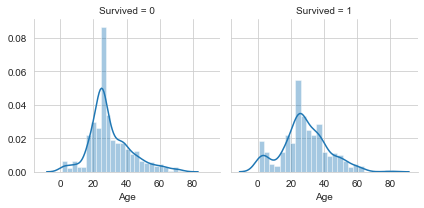

In [68]:
# visualizing survived based on Age
g = sns.FacetGrid(train, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

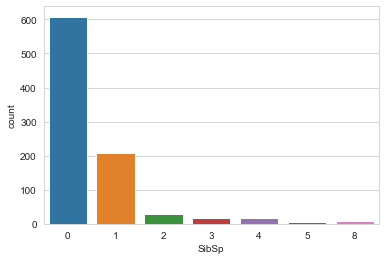

In [26]:
# Count of sibsp
sns.countplot(x='SibSp', data=train)

More passengers came without a sibling or a spouse.

# Data Cleaning
We want to fill in the missing Age value instead of dropping NA. To do that we have to check average age using passenger class.

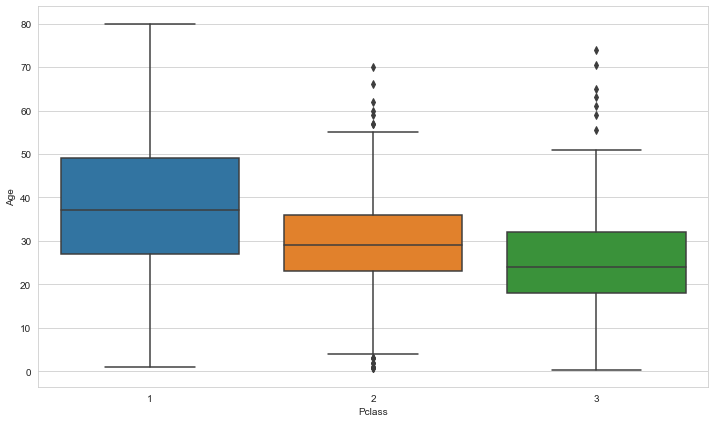

In [35]:
# Boxplot to determine average age for each class
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [40]:
# Determine the exact average ages for Pclass 1, 2, 3 for our next function using GroupBy function.

In [36]:
grouped = train.groupby('Pclass')

In [38]:
avg_age = grouped.mean()

In [39]:
avg_age

PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550

In [42]:
''' Replacing all Age null values with the average of their respective Pclass.
    (Pclass, Age)(1, 38)(2, 29)(3, 25) '''

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 29
        
        else:
            return 25
        
    else:
        return Age

In [45]:
# Applying the function so we can fill in the NA values

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

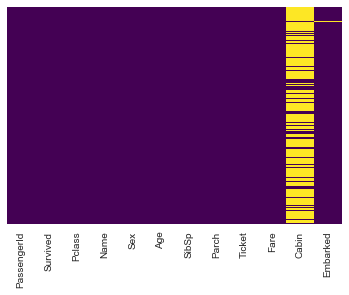

In [46]:
# Let's check our heatmap for the changes in the age column
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [73]:
# We have to drop the cabin column and the two null embarked instances
# train.drop('Cabin', axis=1, inplace=True)

In [74]:
train.dropna(inplace=True)

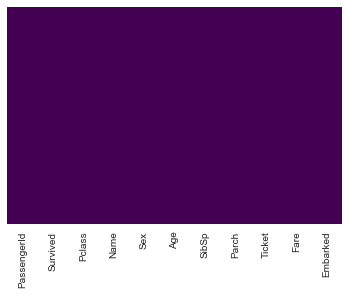

In [75]:
# Let's check our heatmap for the dropped Cabin and changes in the Embarked column
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### What we have done
* imported our data
* explored its head, columns and statistical summary
* perform univariate analysis
* perform bivariate analysis
* find and replace missing values with the average
* we also dropped some columns and rows.